# Data Analysis of South Africa's meat imports

We make a simple analysis using the `sa_trade_report.csv` data set for getting insights on South Africa's meat demands. The project is organized as it follows:
1. Data Wrangling
    a. Exploratory analysis
    b. Data transformation
    c. Data cleaning
2. Data Visualization
3. Conclusions


## Loading the dataset

In [1]:
import numpy as np
from numpy import nan as NA
import pandas as pd
import glob
import os as os
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.get_option('display.precision')

6

In [3]:
pd.set_option('display.max.columns', None)
pd.set_option('display.max.rows', 20)
pd.set_option('display.precision',2)

Since data was only accessible for a two-year period, many .csv files were downloaded. Let's merge all of them into one:

In [4]:
path = r'C:\Users\felip\python_work\Projects\DA_South_African_Trade\files'              
all_files = glob.iglob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

## Exploratory analysis

Let's take a look at the dataset:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29650 entries, 0 to 29649
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TradeType                 29650 non-null  object 
 1   DistrictOfficeCode        29650 non-null  object 
 2   DistrictOfficeName        29650 non-null  object 
 3   CountryOfOrigin           26457 non-null  object 
 4   CountryOfOriginName       29650 non-null  object 
 5   CountryOfDestination      29650 non-null  object 
 6   CountryOfDestinationName  29650 non-null  object 
 7   Tariff                    29650 non-null  int64  
 8   StatisticalUnit           29650 non-null  object 
 9   TransportCode             29650 non-null  int64  
 10  TransportCodeDescription  29650 non-null  object 
 11  YearMonth                 29650 non-null  int64  
 12  CalendarYear              29650 non-null  int64  
 13  Section                   29650 non-null  int64  
 14  Sectio

Note: `NaN` values in 'CountryOfOrigin'

In [6]:
df.dtypes.value_counts()

object     13
int64       7
float64     1
dtype: int64

In [7]:
df.select_dtypes('float64').describe()

,StatisticalQuantity
count,2.96e+04
mean,2.22e+05
std,7.78e+05
min,1.00e-02
25%,2.47e+04
50%,5.19e+04
75%,1.56e+05
max,1.55e+07


In [8]:
df.CountryOfOrigin.nunique()

72

In [9]:
df[['CountryOfOriginName']].info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29650 entries, 0 to 29649
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CountryOfOriginName  29650 non-null  object
dtypes: object(1)
memory usage: 1.8 MB


In [10]:
type(df)

pandas.core.frame.DataFrame

In [11]:
df.shape

(29650, 21)

In [12]:
df.head()

,TradeType,DistrictOfficeCode,DistrictOfficeName,CountryOfOrigin,CountryOfOriginName,CountryOfDestination,CountryOfDestinationName,Tariff,StatisticalUnit,TransportCode,TransportCodeDescription,YearMonth,CalendarYear,Section,SectionAndDescription,Chapter,ChapterAndDescription,TariffAndDescription,StatisticalQuantity,CustomsValue,WorldRegion
0,Imports,CTN,Cape Town,AU,Australia,ZA,South Africa,2062200,KG,0,Transport mode not specified (Unknown - Other),201001,2010,1,1 - Live animals,2,02 - Meat and edible meat offal,02062200 - Livers,54026.68,237749,OCEANIA
1,Imports,CTN,Cape Town,AU,Australia,ZA,South Africa,2069000,KG,0,Transport mode not specified (Unknown - Other),201001,2010,1,1 - Live animals,2,02 - Meat and edible meat offal,"02069000 - Other, Frozen",60696.86,497049,OCEANIA
2,Imports,CTN,Cape Town,AU,Australia,ZA,South Africa,2071490,KG,0,Transport mode not specified (Unknown - Other),201001,2010,1,1 - Live animals,2,02 - Meat and edible meat offal,02071490 - Other,45072.00,367064,OCEANIA
3,Imports,CTN,Cape Town,AU,Australia,ZA,South Africa,2072700,KG,0,Transport mode not specified (Unknown - Other),201001,2010,1,1 - Live animals,2,02 - Meat and edible meat offal,"02072700 - Cuts And Offal, Frozen",23340.00,203859,OCEANIA
4,Imports,CLP,Caledonspoort,LS,Lesotho,ZA,South Africa,2071300,KG,3,Road,201001,2010,1,1 - Live animals,2,02 - Meat and edible meat offal,"02071300 - Cuts And Offal, Fresh Or Chilled",124.00,21350,AFRICA


In [13]:
df.tail()

,TradeType,DistrictOfficeCode,DistrictOfficeName,CountryOfOrigin,CountryOfOriginName,CountryOfDestination,CountryOfDestinationName,Tariff,StatisticalUnit,TransportCode,TransportCodeDescription,YearMonth,CalendarYear,Section,SectionAndDescription,Chapter,ChapterAndDescription,TariffAndDescription,StatisticalQuantity,CustomsValue,WorldRegion
29645,Imports,CTN,Cape Town,US,United States,ZA,South Africa,2071493,KG,1,Maritime,202110,2021,1,1 - Live animals,2,02 - Meat and edible meat offal,02071493 - Leg quarters,1.11e+06,11635186,AMERICA
29646,Imports,DBN,Durban,CA,Canada,ZA,South Africa,2072700,KG,1,Maritime,202110,2021,1,1 - Live animals,2,02 - Meat and edible meat offal,"02072700 - Cuts And Offal, Frozen",3.38e+05,7499473,AMERICA
29647,Imports,CTN,Cape Town,IT,Italy,ZA,South Africa,2101200,KG,1,Maritime,202110,2021,1,1 - Live animals,2,02 - Meat and edible meat offal,02101200 - Bellies (Streaky) And Cuts Thereof,2.98e+03,552193,EUROPE
29648,Imports,CTN,Cape Town,BR,Brazil,ZA,South Africa,2071498,KG,1,Maritime,202110,2021,1,1 - Live animals,2,02 - Meat and edible meat offal,02071498 - Drumsticks,7.76e+04,934638,AMERICA
29649,Imports,CTN,Cape Town,BR,Brazil,ZA,South Africa,2071415,KG,1,Maritime,202110,2021,1,1 - Live animals,2,02 - Meat and edible meat offal,02071415 - Other,8.20e+04,1885789,AMERICA


In [14]:
df.TariffAndDescription.sample(5, random_state=40)

1993                       02062900 - Other
17118    02044200 - Other Cuts With Bone In
17185                      02062900 - Other
5437                       02071490 - Other
9647                    02023000 - Boneless
Name: TariffAndDescription, dtype: object

In [15]:
df.CountryOfOrigin.isna().sum()

3193

In [16]:
df.CountryOfOrigin.isna().mean() *100

10.768971332209107

In [17]:
df.CountryOfOrigin.value_counts(dropna=False)

BR     3316
NaN    3193
ES     2431
AU     2209
IE     2166
       ... 
SR        1
GE        1
BV        1
BH        1
SV        1
Name: CountryOfOrigin, Length: 73, dtype: int64

In [18]:
top_n = df.CountryOfOriginName.value_counts().index[:10]
(
    df.assign(
        CountryOfOriginName=df.CountryOfOriginName.where(
            df.CountryOfOriginName.isin(top_n), 'Other'
        )
    ).CountryOfOriginName.value_counts()
)

Other             8746
Brazil            3316
Namibia           3193
Spain             2431
Australia         2209
Ireland           2166
Argentina         2011
United States     1518
Germany           1460
United Kingdom    1424
New Zealand       1176
Name: CountryOfOriginName, dtype: int64

<AxesSubplot:>

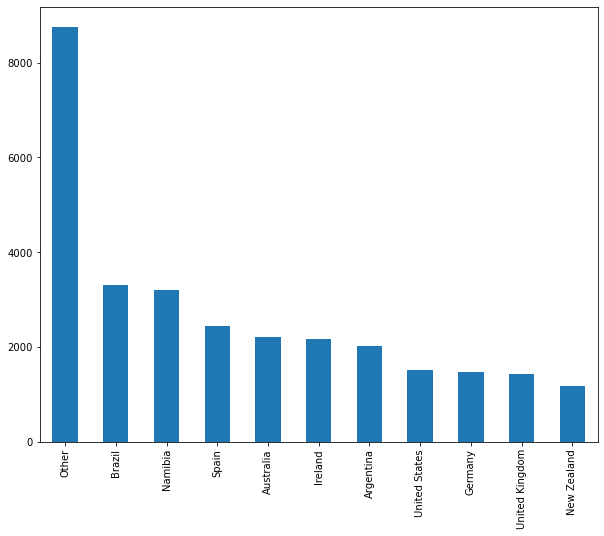

In [19]:
fig, ax = plt.subplots(figsize=(10,8))
top_n = df.CountryOfOriginName.value_counts().index[:10]
(
    df.assign(
        CountryOfOriginName=df.CountryOfOriginName.where(
            df.CountryOfOriginName.isin(top_n), 'Other'
        )
    )
    .CountryOfOriginName.value_counts()
    .plot.bar(ax=ax)
)

<AxesSubplot:xlabel='count', ylabel='CountryOfOriginName'>

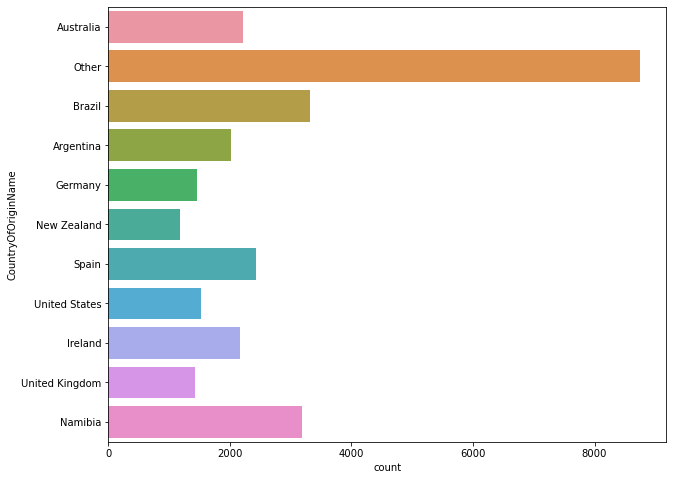

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
top_n = df.CountryOfOriginName.value_counts(dropna=False).index[:10]
sns.countplot(
    y='CountryOfOriginName',
    data=(
        df.assign(
            CountryOfOriginName=df.CountryOfOriginName.where(
                df.CountryOfOriginName.isin(top_n), 'Other'
            )
        )
    ),
)

<AxesSubplot:xlabel='count', ylabel='CountryOfOrigin'>

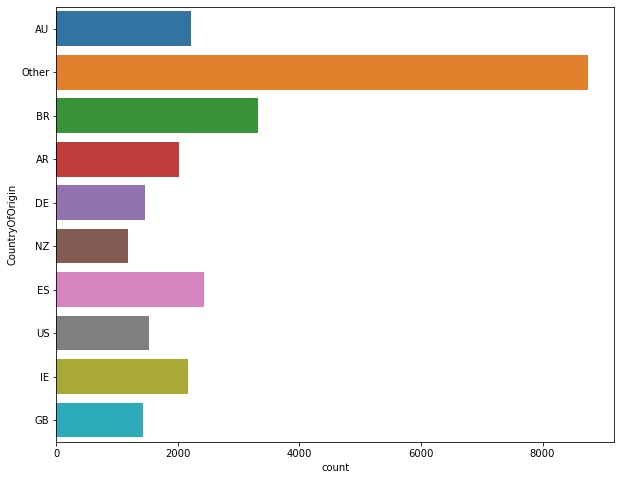

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))
top_n = df.CountryOfOrigin.value_counts(dropna=False).index[:10]
sns.countplot(
    y='CountryOfOrigin',
    data=(
        df.assign(
            CountryOfOrigin=df.CountryOfOrigin.where(
                df.CountryOfOrigin.isin(top_n), 'Other'
            )
        )
    ),
)

In [22]:
num_rows = df.shape[0]
num_missing = num_rows - df.count()
print(num_missing)

TradeType                   0
DistrictOfficeCode          0
DistrictOfficeName          0
CountryOfOrigin          3193
CountryOfOriginName         0
                         ... 
ChapterAndDescription       0
TariffAndDescription        0
StatisticalQuantity         0
CustomsValue                0
WorldRegion                 0
Length: 21, dtype: int64


In [23]:
print(df.CountryOfOrigin.value_counts(dropna=False).head())

BR     3316
NaN    3193
ES     2431
AU     2209
IE     2166
Name: CountryOfOrigin, dtype: int64


In [24]:
df_null = df.loc[df.isnull().any(axis=1)]
df_null

,TradeType,DistrictOfficeCode,DistrictOfficeName,CountryOfOrigin,CountryOfOriginName,CountryOfDestination,CountryOfDestinationName,Tariff,StatisticalUnit,TransportCode,TransportCodeDescription,YearMonth,CalendarYear,Section,SectionAndDescription,Chapter,ChapterAndDescription,TariffAndDescription,StatisticalQuantity,CustomsValue,WorldRegion
111,Imports,NAR,Narogas,NaN,Namibia,ZA,South Africa,2041000,KG,3,Road,201001,2010,1,1 - Live animals,2,02 - Meat and edible meat offal,02041000 - Carcasses And Half-Carcasses Of Lam...,122479.00,4552497,AFRICA
112,Imports,NAR,Narogas,NaN,Namibia,ZA,South Africa,2061010,KG,3,Road,201001,2010,1,1 - Live animals,2,02 - Meat and edible meat offal,02061010 - Livers,24332.48,168698,AFRICA
113,Imports,NAR,Narogas,NaN,Namibia,ZA,South Africa,2102012,KG,3,Road,201001,2010,1,1 - Live animals,2,02 - Meat and edible meat offal,02102012 - Other,10.00,1440,AFRICA
115,Imports,NAR,Narogas,NaN,Namibia,ZA,South Africa,2011000,KG,3,Road,201001,2010,1,1 - Live animals,2,02 - Meat and edible meat offal,02011000 - Carcasses And Half-Carcasses,24898.00,1939693,AFRICA
116,Imports,NAR,Narogas,NaN,Namibia,ZA,South Africa,2102000,KG,3,Road,201001,2010,1,1 - Live animals,2,02 - Meat and edible meat offal,02102000 - Meat Of Bovine Animals,1441.00,168065,AFRICA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29484,Imports,NAR,Narogas,NaN,Namibia,ZA,South Africa,2022090,KG,3,Road,202110,2021,1,1 - Live animals,2,02 - Meat and edible meat offal,02022090 - Other,30742.00,1338506,AFRICA
29485,Imports,NAR,Narogas,NaN,Namibia,ZA,South Africa,2102090,KG,3,Road,202110,2021,1,1 - Live animals,2,02 - Meat and edible meat offal,02102090 - Other,100.00,9200,AFRICA
29486,Imports,NAR,Narogas,NaN,Namibia,ZA,South Africa,2109912,KG,3,Road,202110,2021,1,1 - Live animals,2,02 - Meat and edible meat offal,02109912 - Other,680.00,141881,AFRICA
29489,Imports,NAR,Narogas,NaN,Namibia,ZA,South Africa,2023090,KG,3,Road,202110,2021,1,1 - Live animals,2,02 - Meat and edible meat offal,02023090 - Other,35208.00,1778216,AFRICA


In [25]:
df_null.loc[df_null['CountryOfOriginName'] == 'Namibia'] 

,TradeType,DistrictOfficeCode,DistrictOfficeName,CountryOfOrigin,CountryOfOriginName,CountryOfDestination,CountryOfDestinationName,Tariff,StatisticalUnit,TransportCode,TransportCodeDescription,YearMonth,CalendarYear,Section,SectionAndDescription,Chapter,ChapterAndDescription,TariffAndDescription,StatisticalQuantity,CustomsValue,WorldRegion
111,Imports,NAR,Narogas,NaN,Namibia,ZA,South Africa,2041000,KG,3,Road,201001,2010,1,1 - Live animals,2,02 - Meat and edible meat offal,02041000 - Carcasses And Half-Carcasses Of Lam...,122479.00,4552497,AFRICA
112,Imports,NAR,Narogas,NaN,Namibia,ZA,South Africa,2061010,KG,3,Road,201001,2010,1,1 - Live animals,2,02 - Meat and edible meat offal,02061010 - Livers,24332.48,168698,AFRICA
113,Imports,NAR,Narogas,NaN,Namibia,ZA,South Africa,2102012,KG,3,Road,201001,2010,1,1 - Live animals,2,02 - Meat and edible meat offal,02102012 - Other,10.00,1440,AFRICA
115,Imports,NAR,Narogas,NaN,Namibia,ZA,South Africa,2011000,KG,3,Road,201001,2010,1,1 - Live animals,2,02 - Meat and edible meat offal,02011000 - Carcasses And Half-Carcasses,24898.00,1939693,AFRICA
116,Imports,NAR,Narogas,NaN,Namibia,ZA,South Africa,2102000,KG,3,Road,201001,2010,1,1 - Live animals,2,02 - Meat and edible meat offal,02102000 - Meat Of Bovine Animals,1441.00,168065,AFRICA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29484,Imports,NAR,Narogas,NaN,Namibia,ZA,South Africa,2022090,KG,3,Road,202110,2021,1,1 - Live animals,2,02 - Meat and edible meat offal,02022090 - Other,30742.00,1338506,AFRICA
29485,Imports,NAR,Narogas,NaN,Namibia,ZA,South Africa,2102090,KG,3,Road,202110,2021,1,1 - Live animals,2,02 - Meat and edible meat offal,02102090 - Other,100.00,9200,AFRICA
29486,Imports,NAR,Narogas,NaN,Namibia,ZA,South Africa,2109912,KG,3,Road,202110,2021,1,1 - Live animals,2,02 - Meat and edible meat offal,02109912 - Other,680.00,141881,AFRICA
29489,Imports,NAR,Narogas,NaN,Namibia,ZA,South Africa,2023090,KG,3,Road,202110,2021,1,1 - Live animals,2,02 - Meat and edible meat offal,02023090 - Other,35208.00,1778216,AFRICA


In [26]:
df.fillna('NAM', inplace=True)

In [27]:
df[['StatisticalQuantity','CustomsValue']].describe()

,StatisticalQuantity,CustomsValue
count,2.96e+04,2.96e+04
mean,2.22e+05,2.76e+06
std,7.78e+05,6.70e+06
min,1.00e-02,1.00e+00
25%,2.47e+04,2.76e+05
50%,5.19e+04,7.78e+05
75%,1.56e+05,2.30e+06
max,1.55e+07,1.52e+08


In [28]:
df['CountryOfOriginName'].value_counts()

Brazil           3316
Namibia          3193
Spain            2431
Australia        2209
Ireland          2166
                 ... 
Suriname            1
Georgia             1
Bouvet Island       1
Bahrain             1
El Salvador         1
Name: CountryOfOriginName, Length: 73, dtype: int64

We can see that most import entries come from European and American countries; Brazil leads the way.

In [29]:
df['WorldRegion'].value_counts()

EUROPE                12659
AMERICA                8250
AFRICA                 4671
OCEANIA                3386
ASIA                    666
OTHER UNCLASSIFIED       18
Name: WorldRegion, dtype: int64

Let's take a quick look at our top1 contender, Brazil:

In [30]:
df.loc[df['CountryOfOriginName'] == 'Brazil','CustomsValue'].max()

152195768

In [31]:
df.loc[df['CountryOfOriginName'] == 'Brazil', 'TariffAndDescription'].value_counts()

02071210 - Mechanically deboned meat    425
02072700 - Cuts And Offal, Frozen       300
02071493 - Leg quarters                 219
02071411 - Breasts                      197
02071429 - Other                        194
                                       ... 
02071413 - Thighs                         1
02071200 - Not Cut In Pieces, Frozen      1
02089090 - Other                          1
02109990 - Other                          1
02091000 - Of Pigs                        1
Name: TariffAndDescription, Length: 48, dtype: int64

We can see that Mechanically deboned meat has the highest amount of entries, followed by leg quarters and Other.

In [32]:
df.loc[df['TariffAndDescription'] == '02071493 - Leg quarters', 'CountryOfOriginName'].value_counts()

Brazil                       219
Ireland                      203
Argentina                    189
Spain                        183
United States                183
                            ... 
Uruguay                        2
Gold, Petroleum and Other      2
South Africa                   2
Unclassified                   1
Sweden                         1
Name: CountryOfOriginName, Length: 21, dtype: int64

We can take a look at the total value of imports from Brazil, yet the data is still to be classified as usd dollars:

In [33]:
df.loc[df['CountryOfOriginName'] == 'Brazil', 'CustomsValue'].max()

152195768

In [34]:
df_ym = df.groupby('YearMonth', sort=False)
df_ym

In [35]:
df_ym['CustomsValue'].value_counts()

YearMonth  CustomsValue
201001     73              1
           485             1
           596             1
           695             1
           800             1
                          ..
202110     17896181        1
           20924713        1
           25607053        1
           36650104        1
           145580338       1
Name: CustomsValue, Length: 29594, dtype: int64

In [36]:
df_year = df.groupby('CalendarYear', sort=False)

In [37]:
df_year['CustomsValue'].sum()

CalendarYear
2010    3605292250
2011    5077316483
2013    6163843515
2012    6113675639
2015    7041306185
2014    6111269854
2016    7801591499
2017    9008130461
2019    8451869934
2018    9134609207
2020    6961017803
2021    6372273062
Name: CustomsValue, dtype: int64

notice change in years

Let's get rid of unnecessary columns:

In [38]:
df_copy = df.copy()

In [39]:
df_copy['YearMonth'] = df_copy['YearMonth'].astype('object')
df_copy['CustomsValue'] = df_copy['CustomsValue'].astype('int64')
df_copy['StatisticalQuantity'] = df_copy['StatisticalQuantity'].astype('int64')

In [40]:
no_columns = ['TradeType', 'DistrictOfficeCode', 'DistrictOfficeName',
              'CountryOfDestination', 'CountryOfDestinationName', 
              'StatisticalUnit', 'TransportCode', 'TransportCodeDescription',
              'Section', 'SectionAndDescription', 'Chapter', 'ChapterAndDescription']
df_copy.drop(no_columns, axis=1, inplace=True)

In [41]:
df_copy.columns

Index(['CountryOfOrigin', 'CountryOfOriginName', 'Tariff', 'YearMonth',
       'CalendarYear', 'TariffAndDescription', 'StatisticalQuantity',
       'CustomsValue', 'WorldRegion'],
      dtype='object')

Ok, now let's specify data types:

In [42]:
cols = [
        'CountryOfOrigin', 'CountryOfOriginName', 
        'Tariff', 'CalendarYear',
        'TariffAndDescription', 'WorldRegion']
df_copy[cols] = df_copy[cols].astype('category')

Nice! After converting columns into categories, our dataset got much lighter. But still there are other tasks to be done:
1. Format YearMonth into a column divided as YYYY-MM
2. Reorder Tariff and World Region columns
3. Delete tariff number from `TariffAndDescription`
4. Transform `StatisticQuantity` into tons. 
5. Classify tariffs in a broader and more meaningful way (ie. chicken, beef, pork etc)
6. Check if StatisticalQuantity and CustomsValue are ok as numbers.

1. Change YearMonth to datetime

In [43]:
df_copy['YearMonth'] = pd.to_datetime(df['YearMonth'], format='%Y%m')


In [44]:
df_copy['Month'] = df_copy['YearMonth'].dt.month

In [45]:
df_copy.tail(5)

,CountryOfOrigin,CountryOfOriginName,Tariff,YearMonth,CalendarYear,TariffAndDescription,StatisticalQuantity,CustomsValue,WorldRegion,Month
29645,US,United States,2071493,2021-10-01,2021,02071493 - Leg quarters,1113219,11635186,AMERICA,10
29646,CA,Canada,2072700,2021-10-01,2021,"02072700 - Cuts And Offal, Frozen",338266,7499473,AMERICA,10
29647,IT,Italy,2101200,2021-10-01,2021,02101200 - Bellies (Streaky) And Cuts Thereof,2984,552193,EUROPE,10
29648,BR,Brazil,2071498,2021-10-01,2021,02071498 - Drumsticks,77550,934638,AMERICA,10
29649,BR,Brazil,2071415,2021-10-01,2021,02071415 - Other,81990,1885789,AMERICA,10


2. Bring `WorldRegion` to the forefront and `Tariff` together with `ChapterAndDescription`

In [46]:
cols1 = list(df_copy.columns.values)
cols1

['CountryOfOrigin',
 'CountryOfOriginName',
 'Tariff',
 'YearMonth',
 'CalendarYear',
 'TariffAndDescription',
 'StatisticalQuantity',
 'CustomsValue',
 'WorldRegion',
 'Month']

In [47]:
df_copy = df_copy[
    ['WorldRegion', 'CountryOfOrigin', 'CountryOfOriginName',
     'YearMonth', 'CalendarYear', 'Month', 'Tariff', 'TariffAndDescription',
     'StatisticalQuantity', 'CustomsValue']]

In [48]:
df_copy.loc[df_copy['Month'] == 2]

,WorldRegion,CountryOfOrigin,CountryOfOriginName,YearMonth,CalendarYear,Month,Tariff,TariffAndDescription,StatisticalQuantity,CustomsValue
134,AFRICA,NAM,Namibia,2010-02-01,2010,2,2022000,02022000 - Other Cuts With Bone In,25000,559469
135,AFRICA,NAM,Namibia,2010-02-01,2010,2,2042100,02042100 - Carcasses And Half-Carcasses,101371,2981625
136,AFRICA,NAM,Namibia,2010-02-01,2010,2,2021000,02021000 - Carcasses And Half-Carcasses,34167,1068826
138,AMERICA,BR,Brazil,2010-02-01,2010,2,2071490,02071490 - Other,79020,690671
139,AFRICA,SZ,Eswatini,2010-02-01,2010,2,2071200,"02071200 - Not Cut In Pieces, Frozen",851,57939
...,...,...,...,...,...,...,...,...,...,...
27404,AMERICA,AR,Argentina,2021-02-01,2021,2,2071429,02071429 - Other,25000,170192
27407,AMERICA,AR,Argentina,2021-02-01,2021,2,2071411,02071411 - Breasts,25950,469421
27408,AMERICA,BR,Brazil,2021-02-01,2021,2,2071415,02071415 - Other,54000,1191537
27409,AMERICA,BR,Brazil,2021-02-01,2021,2,2071411,02071411 - Breasts,108420,2136082


Nice, we are getting there! 

3. Delete tariff number from `TariffAndDescription`


In [49]:
df_copy['TariffAndDescription'] = [x.split('-')[-1] for x in df['TariffAndDescription']]

In [50]:
df_copy.head()

,WorldRegion,CountryOfOrigin,CountryOfOriginName,YearMonth,CalendarYear,Month,Tariff,TariffAndDescription,StatisticalQuantity,CustomsValue
0,OCEANIA,AU,Australia,2010-01-01,2010,1,2062200,Livers,54026,237749
1,OCEANIA,AU,Australia,2010-01-01,2010,1,2069000,"Other, Frozen",60696,497049
2,OCEANIA,AU,Australia,2010-01-01,2010,1,2071490,Other,45072,367064
3,OCEANIA,AU,Australia,2010-01-01,2010,1,2072700,"Cuts And Offal, Frozen",23340,203859
4,AFRICA,LS,Lesotho,2010-01-01,2010,1,2071300,"Cuts And Offal, Fresh Or Chilled",124,21350


Great! Now, we know that these tariff numbers describe many meat cuts. 

4. But what if we rebranded as chicken, beef, pork, an so on?

In [51]:
df_copy.loc[df_copy['Tariff'] == 2061010, 'TariffAndDescription'].value_counts()

 Livers    41
Name: TariffAndDescription, dtype: int64

Rename columns:

In [52]:
df_copy.rename(
    columns={
        'WorldRegion': 'Region',
        'CountryOfOrigin':'Country Code',
        'CountryOfOriginName': 'Country',
        'CalendarYear':'Year',
        'YearMonth':'Date',
        'Tariff': 'Meat Type',
        'TariffAndDescription':'Description',
        'StatisticalQuantity':'Quantity',
        'CustomsValue': 'Value',
    },
    inplace=True
)

In [53]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29650 entries, 0 to 29649
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Region        29650 non-null  category      
 1   Country Code  29650 non-null  category      
 2   Country       29650 non-null  category      
 3   Date          29650 non-null  datetime64[ns]
 4   Year          29650 non-null  category      
 5   Month         29650 non-null  int64         
 6   Meat Type     29650 non-null  category      
 7   Description   29650 non-null  object        
 8   Quantity      29650 non-null  int64         
 9   Value         29650 non-null  int64         
dtypes: category(5), datetime64[ns](1), int64(3), object(1)
memory usage: 1.3+ MB


In [54]:
df_copy['Month'] = df_copy['Month'].astype('category')
df_copy['Meat Type'] = df_copy['Meat Type'].astype('string')

In [55]:
df_copy = df_copy.replace(
    {'Meat Type': {
        r'^201.*': 'Beef - Fresh',
        r'^202.*': 'Beef - Frozen',
        r'^203.*': 'Pork',
        r'^204.*': 'Sheep/Goat',
        r'^205.*': 'Horse',
        r'^2061.*': 'Beef Offals - Fresh',
        r'^2062.*': 'Beef Offals - Frozen',
        r'^2063.*': 'Pork Offals - Fresh',
        r'^2064.*': 'Pork Offals - Frozen',
        r'^2068.*': 'Pork Offals - Fresh',
        r'^2069.*': 'Pork Offals - Frozen',
        r'^207.*': 'Chicken',
        r'^2072.*': 'Turkey',
        r'^2074.*': 'Duck',
        r'^2075.*': 'Goose',
        r'^208.*': 'Other',
        r'^209.*': 'Fat',
        r'^2101.*': 'Smoked/In Brine/Salted Pork',
        r'^2102.*': 'Smoked/In Brine/Salted Beef',
        r'^2109.*': 'Smoked/In Brine/Salted Meat'}
    },
    regex=True)

In [56]:
df_copy['Meat Type'] = df_copy['Meat Type'].astype(dtype='category')
df_copy['Description'] = df_copy['Description'].astype(dtype='category')

In [57]:
df_copy['Description'] = df_copy['Description'].str.lstrip()

In [58]:
df_copy['Value'] = df_copy['Value'].to_numpy()

In [59]:
df_copy

,Region,Country Code,Country,Date,Year,Month,Meat Type,Description,Quantity,Value
0,OCEANIA,AU,Australia,2010-01-01,2010,1,Beef Offals - Frozen,Livers,54026,237749
1,OCEANIA,AU,Australia,2010-01-01,2010,1,Pork Offals - Frozen,"Other, Frozen",60696,497049
2,OCEANIA,AU,Australia,2010-01-01,2010,1,Chicken,Other,45072,367064
3,OCEANIA,AU,Australia,2010-01-01,2010,1,Chicken,"Cuts And Offal, Frozen",23340,203859
4,AFRICA,LS,Lesotho,2010-01-01,2010,1,Chicken,"Cuts And Offal, Fresh Or Chilled",124,21350
...,...,...,...,...,...,...,...,...,...,...
29645,AMERICA,US,United States,2021-10-01,2021,10,Chicken,Leg quarters,1113219,11635186
29646,AMERICA,CA,Canada,2021-10-01,2021,10,Chicken,"Cuts And Offal, Frozen",338266,7499473
29647,EUROPE,IT,Italy,2021-10-01,2021,10,Smoked/In Brine/Salted Pork,Bellies (Streaky) And Cuts Thereof,2984,552193
29648,AMERICA,BR,Brazil,2021-10-01,2021,10,Chicken,Drumsticks,77550,934638


In [60]:
df_copy['Quantity'] = df_copy['Quantity']/1000

In [61]:
df_copy.head()

,Region,Country Code,Country,Date,Year,Month,Meat Type,Description,Quantity,Value
0,OCEANIA,AU,Australia,2010-01-01,2010,1,Beef Offals - Frozen,Livers,54.03,237749
1,OCEANIA,AU,Australia,2010-01-01,2010,1,Pork Offals - Frozen,"Other, Frozen",60.70,497049
2,OCEANIA,AU,Australia,2010-01-01,2010,1,Chicken,Other,45.07,367064
3,OCEANIA,AU,Australia,2010-01-01,2010,1,Chicken,"Cuts And Offal, Frozen",23.34,203859
4,AFRICA,LS,Lesotho,2010-01-01,2010,1,Chicken,"Cuts And Offal, Fresh Or Chilled",0.12,21350


In [62]:
df_copy = df_copy[df_copy.Country != 'South Africa']

In [64]:
df_copy.loc[df_copy['Country'] == 'South Africa']

,Region,Country Code,Country,Date,Year,Month,Meat Type,Description,Quantity,Value


In [65]:
df_copy.to_csv('sa_trade.csv', index=False)